In [9]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
dataset1 = pd.read_csv('sample.csv')
X = dataset1[['input']].values
y = dataset1[['output']].values

In [17]:
print(X)
print(y)

[[ 10]
 [ 20]
 [ 30]
 [ 40]
 [ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]
 [110]
 [120]
 [130]
 [140]
 [150]
 [160]
 [170]
 [180]
 [190]
 [200]]
[[ 101]
 [ 201]
 [ 301]
 [ 401]
 [ 501]
 [ 601]
 [ 701]
 [ 801]
 [ 901]
 [1001]
 [1101]
 [1201]
 [1301]
 [1401]
 [1501]
 [1601]
 [1701]
 [1801]
 [1901]
 [2001]]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
import torch

In [21]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [22]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10, 14)
        self.fc4 = nn.Linear(14, 1)
        self.relu = nn.ReLU()
        self.history={'loss':[]}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [23]:
daksha=NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(daksha.parameters(), lr=0.001)

In [24]:
def train_model(daksha, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(daksha(X_train), y_train)
        loss.backward()
        optimizer.step()

        daksha.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [25]:
train_model(daksha, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 1284213.000000
Epoch [200/2000], Loss: 1240270.750000
Epoch [400/2000], Loss: 1027524.000000
Epoch [600/2000], Loss: 635515.375000
Epoch [800/2000], Loss: 264244.031250
Epoch [1000/2000], Loss: 150645.562500
Epoch [1200/2000], Loss: 128751.859375
Epoch [1400/2000], Loss: 100495.359375
Epoch [1600/2000], Loss: 70001.945312
Epoch [1800/2000], Loss: 41243.785156


In [26]:
with torch.no_grad():
    test_loss = criterion(daksha(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 20004.500000


In [27]:
loss_df = pd.DataFrame(daksha.history)

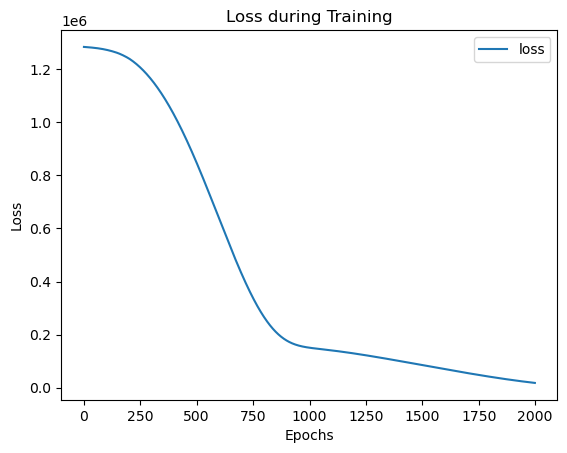

In [28]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [32]:
X_n1_1 = torch.tensor([[70]], dtype=torch.float32)
prediction = daksha(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 816.1174926757812
